In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import datetime
import functions_hiwi as fct

In [2]:
main_dir = r'C:\Users\illic\Python\data_hiwi'

In [3]:
# set paths to specific data
WS100_rtu_path = os.path.join(main_dir, r'WS100_ready_to_use.csv')
WS300_rtu_path = os.path.join(main_dir, r'WS300_ready_to_use.csv')
Raine_rtu_path = os.path.join(main_dir, r'Raine_ready_to_use.csv')
L_pcp_rtu_path = os.path.join(main_dir, r'L_pcp_ready_to_use.csv')
lhg_rtu_path = os.path.join(main_dir, r'lhg_rtu.csv')

In [4]:
# read data

# read data and convert to utc
WS100_rtu = pd.read_csv(WS100_rtu_path, sep=',', index_col=0) # , skiprows=1
WS100_rtu.index = pd.to_datetime(WS100_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

WS300_rtu = pd.read_csv(WS300_rtu_path, sep=',', index_col=0) # , skiprows=1
WS300_rtu.index = pd.to_datetime(WS300_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

Raine_rtu = pd.read_csv(Raine_rtu_path, sep=',', index_col=0) # , skiprows=1
Raine_rtu.index = pd.to_datetime(Raine_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

L_pcp_rtu = pd.read_csv(L_pcp_rtu_path, sep=',', index_col=0) # , skiprows=1
L_pcp_rtu.index = pd.to_datetime(L_pcp_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

lhg_rtu = pd.read_csv(lhg_rtu_path, sep=',', index_col=0) # , skiprows=1
lhg_rtu.index = pd.to_datetime(lhg_rtu.index, format='%Y-%m-%d %H:%M:%S') + pd.DateOffset(hours=1)

In [5]:
# Ausreißer manuell auf np.nan setzen
WS100_rtu['precipitation.1'][WS100_rtu['precipitation.1'] == WS100_rtu['precipitation.1'].max()] = np.nan

WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan
WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan

L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan
L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan

In [6]:
# precipitation_type für WS100

# 0 = No precipitation
# 60 = Liquid precipitation, e.g. rain
# 70 = Solid precipitation, e.g. snow
# 40 = unspecified precipitation
# (WS401-UMB, WS601-UMB, external
# rain gauge)
# WS100-UMB only:
# 67 = freezing rain
# 69 = sleet
# 90 = hail

In [7]:
WS100_rtu_1M = fct.resampleDf(WS100_rtu, '1M', max_nan=2)

In [9]:
WS100_rtu_3M = fct.resampleDf(WS100_rtu, '3M', leave_nan=False)

In [10]:
WS100_rtu_6M = fct.resampleDf(WS100_rtu, '6M', leave_nan=False)

In [11]:
WS100_rtu_1Y = fct.resampleDf(WS100_rtu, '1Y', leave_nan=False)

In [12]:
def balkendiagramm(dataframe, column, name):

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.bar(dataframe.index, dataframe[column], width=20, align='edge')

    ax.set_title(name)
    ax.set_xlabel('DateTime')
    ax.set_ylabel('Precipitation in [mm]')

    timedelta = dataframe.index[2] - dataframe.index[1]

    if timedelta == datetime.timedelta(days=30) or timedelta == datetime.timedelta(days=31) or timedelta == datetime.timedelta(days=28) or timedelta == datetime.timedelta(days=29):
        plt.xticks(dataframe.index[::3], rotation=45)
    else:
        plt.xticks(dataframe.index, rotation=45)

    plt.yticks(rotation=45)

    plt.show()
    
    return

In [13]:
summen_WS100 = pd.concat([WS100_rtu_1M['precipitation.1'], WS100_rtu_3M['precipitation.1'], WS100_rtu_6M['precipitation.1'], WS100_rtu_1Y['precipitation.1']], axis=1)
summen_WS100.columns = ['1M', '3M', '6M', '1Y']
summen_WS100.fillna('', inplace=True)

C:\Users\illic\AppData\Local\Temp\ipykernel_16984\3212098018.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  summen_WS100.fillna('', inplace=True)


In [14]:
# summen_WS100 # bis auf 1M Resample wurden die anderen Resamples mit leave_nan=False gemacht

In [15]:
WS300_rtu_1M = fct.resampleDf(WS300_rtu, '1M', max_nan=2)
WS300_rtu_3M = fct.resampleDf(WS300_rtu, '3M', leave_nan=False)
WS300_rtu_6M = fct.resampleDf(WS300_rtu, '6M', leave_nan=False)
WS300_rtu_1Y = fct.resampleDf(WS300_rtu, '1Y', leave_nan=False)

In [16]:
summen_WS300 = pd.concat([WS300_rtu_1M['precipitation.1'], WS300_rtu_3M['precipitation.1'], WS300_rtu_6M['precipitation.1'], WS300_rtu_1Y['precipitation.1']], axis=1)
summen_WS300.columns = ['1M', '3M', '6M', '1Y']
summen_WS300.fillna('', inplace=True)

C:\Users\illic\AppData\Local\Temp\ipykernel_16984\1589562735.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  summen_WS300.fillna('', inplace=True)


In [17]:
# summen_WS300

In [18]:
Raine_rtu_1M = fct.resampleDf(Raine_rtu, '1M', max_nan=2)
Raine_rtu_3M = fct.resampleDf(Raine_rtu, '3M', leave_nan=False)
Raine_rtu_6M = fct.resampleDf(Raine_rtu, '6M', leave_nan=False)
Raine_rtu_1Y = fct.resampleDf(Raine_rtu, '1Y', leave_nan=False)

In [19]:
summe_Raine = pd.concat([Raine_rtu_1M['Niederschlagsmenge'], Raine_rtu_3M['Niederschlagsmenge'], Raine_rtu_6M['Niederschlagsmenge'], Raine_rtu_1Y['Niederschlagsmenge']], axis=1)
summe_Raine.columns = ['1M', '3M', '6M', '1Y']
summe_Raine.fillna('', inplace=True)

C:\Users\illic\AppData\Local\Temp\ipykernel_16984\2636199226.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  summe_Raine.fillna('', inplace=True)


In [20]:
# summe_Raine

In [21]:
L_pcp_rtu_1M = fct.resampleDf(L_pcp_rtu, '1M', max_nan=2)
L_pcp_rtu_3M = fct.resampleDf(L_pcp_rtu, '3M', leave_nan=False)
L_pcp_rtu_6M = fct.resampleDf(L_pcp_rtu, '6M', leave_nan=False)
L_pcp_rtu_1Y = fct.resampleDf(L_pcp_rtu, '1Y', leave_nan=False)

In [22]:
# L_pcp_rtu_1M

In [23]:
summe_L_pcp = pd.concat([L_pcp_rtu_1M, L_pcp_rtu_3M, L_pcp_rtu_6M, L_pcp_rtu_1Y], axis=1)
# summe_L_pcp.columns = ['', '1M', '', '', '3M', '', '', '6M', '', '', '1Y', '',]
summe_L_pcp.columns = pd.MultiIndex.from_tuples([('1M', 'rr07'), ('1M', 'rr09'), ('1M', 'rr10'), 
                                                 ('3M', 'rr07'), ('3M', 'rr09'), ('3M', 'rr10'), 
                                                 ('6M', 'rr07'), ('6M', 'rr09'), ('6M', 'rr10'), 
                                                 ('1Y', 'rr07'), ('1Y', 'rr09'), ('1Y', 'rr10')])
summe_L_pcp.fillna('', inplace=True)

C:\Users\illic\AppData\Local\Temp\ipykernel_16984\4113631705.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  summe_L_pcp.fillna('', inplace=True)


In [24]:
# summe_L_pcp

In [25]:
summen_alle_Stationen = pd.concat([summen_WS100, summen_WS300, summe_Raine, summe_L_pcp], axis=1)

In [26]:
# summen_alle_Stationen

In [27]:
summen_WS100.to_csv(r'C:\Users\illic\Python\data_hiwi\Summen\summen_WS100.csv', sep=';')
summen_WS300.to_csv(r'C:\Users\illic\Python\data_hiwi\Summen\summen_WS300.csv', sep=';')
summe_Raine.to_csv(r'C:\Users\illic\Python\data_hiwi\Summen\summe_Raine.csv', sep=';')
summe_L_pcp.to_csv(r'C:\Users\illic\Python\data_hiwi\Summen\summe_L_pcp.csv', sep=';')

In [28]:
# Raine_rtu

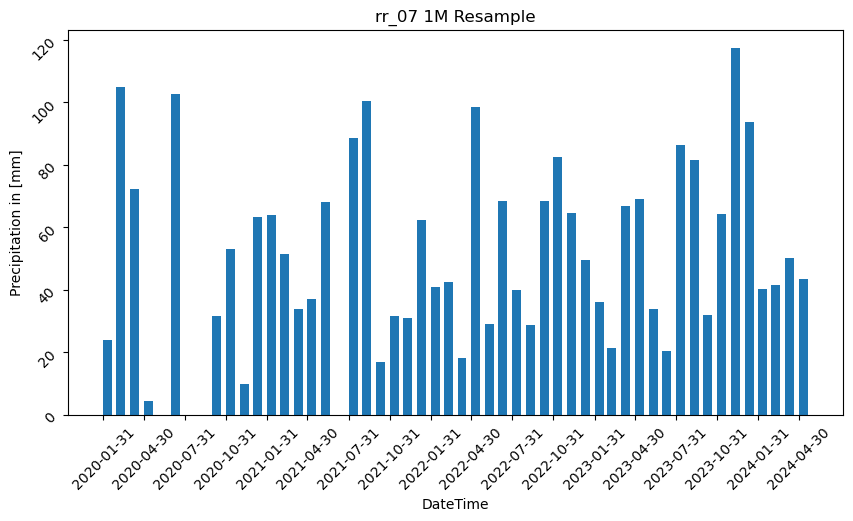

In [29]:
dataframe = L_pcp_rtu_1M
column = 'rr_07'
name = 'rr_07 1M Resample'

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(dataframe.index, dataframe[column], width=20, align='edge')

ax.set_title(name)
ax.set_xlabel('DateTime')
ax.set_ylabel('Precipitation in [mm]')

# timedelta = dataframe.index[2] - dataframe.index[1]

# if timedelta == datetime.timedelta(days=30) or timedelta == datetime.timedelta(days=31) or timedelta == datetime.timedelta(days=28) or timedelta == datetime.timedelta(days=29):
if len(dataframe.index) > 40:
    plt.xticks(dataframe.index[::3], rotation=45)
else:
    plt.xticks(dataframe.index, rotation=45)
    
plt.yticks(rotation=45)

plt.show()

In [30]:
list_stations_columns = [[WS100_rtu_1M, 'precipitation.1', 'WS100 1M Resample'], 
                         [WS100_rtu_3M, 'precipitation.1', 'WS100 3M Resample'], 
                         [WS100_rtu_6M, 'precipitation.1', 'WS100 6M Resample'], 
                         [WS100_rtu_1Y, 'precipitation.1', 'WS100 1Y Resample'], 
                         [WS300_rtu_1M, 'precipitation.1', 'WS300 1M Resample'], 
                         [WS300_rtu_3M, 'precipitation.1', 'WS300 3M Resample'], 
                         [WS300_rtu_6M, 'precipitation.1', 'WS300 6M Resample'], 
                         [WS300_rtu_1Y, 'precipitation.1', 'WS300 1Y Resample'], 
                         [Raine_rtu_1M, 'Niederschlagsmenge', 'Raine 1M Resample'], 
                         [Raine_rtu_3M, 'Niederschlagsmenge', 'Raine 3M Resample'], 
                         [Raine_rtu_6M, 'Niederschlagsmenge', 'Raine 6M Resample'], 
                         [Raine_rtu_1Y, 'Niederschlagsmenge', 'Raine 1Y Resample'], 
                         [L_pcp_rtu_1M, 'rr_07', 'L_pcp rr_07 1M Resample'], 
                         [L_pcp_rtu_3M, 'rr_07', 'L_pcp rr_07 3M Resample'], 
                         [L_pcp_rtu_6M, 'rr_07', 'L_pcp rr_07 6M Resample'], 
                         [L_pcp_rtu_1Y, 'rr_07', 'L_pcp rr_07 1Y Resample'],  
                         [L_pcp_rtu_1M, 'rr_09', 'L_pcp rr_09 1M Resample'], 
                         [L_pcp_rtu_3M, 'rr_09', 'L_pcp rr_09 3M Resample'], 
                         [L_pcp_rtu_6M, 'rr_09', 'L_pcp rr_09 6M Resample'], 
                         [L_pcp_rtu_1Y, 'rr_09', 'L_pcp rr_09 1Y Resample'], 
                         [L_pcp_rtu_1M, 'rr_10', 'L_pcp rr_10 1M Resample'], 
                         [L_pcp_rtu_3M, 'rr_10', 'L_pcp rr_10 3M Resample'], 
                         [L_pcp_rtu_6M, 'rr_10', 'L_pcp rr_10 6M Resample'], 
                         [L_pcp_rtu_1Y, 'rr_10', 'L_pcp rr_10 1Y Resample']]

In [31]:
# for list in list_stations_columns:
#     balkendiagramm(list[0], list[1], list[2])

In [32]:
# Summenwerte der verschiedenen Stationen vergleichen

In [33]:
# startindex WS100: 2021-10-20 17:00:00	
# endtindex WS100: 2023-10-20 16:21:00	

# startindex WS300: 2020-10-23 09:00:00	
# endtindex WS300: 2023-10-23 08:46:00	

# startindex Raine: 2022-11-03 11:46:00	
# endtindex Raine: 2024-04-22 17:13:00	

# startindex L_pcp: 2020-01-01 00:01:00	
# endtindex L_pcp: 2024-04-23 00:00:00	

# sich überschneidender Zeitraum
# startindex: 2022-11-03
# endtindex: 2023-10-23

In [34]:
# erstelle datetime index für den gesamten maximalen Zeitraum
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2024, 4, 23)
index_max_range = pd.date_range(start, end, freq='M')

In [35]:
# erstelle datetime index für den sich überschneidenden Zeitraum aller Stationen
start = datetime.datetime(2022, 11, 3)
end = datetime.datetime(2023, 10, 23)
index_überschneidend = pd.date_range(start, end, freq='M')

In [36]:
# # 1M
list_stations = [WS100_rtu_1M['precipitation.1'], WS300_rtu_1M['precipitation.1'], Raine_rtu_1M['Niederschlagsmenge'], L_pcp_rtu_1M['rr_07'], L_pcp_rtu_1M['rr_09'], L_pcp_rtu_1M['rr_10']]
# # 3M
# list_stations = [WS100_rtu_3M['precipitation.1'], WS300_rtu_3M['precipitation.1'], Raine_rtu_3M['Niederschlagsmenge'], L_pcp_rtu_3M['rr_07'], L_pcp_rtu_3M['rr_09'], L_pcp_rtu_3M['rr_10']]
# # 6M
# list_stations = [WS100_rtu_6M['precipitation.1'], WS300_rtu_6M['precipitation.1'], Raine_rtu_6M['Niederschlagsmenge'], L_pcp_rtu_6M['rr_07'], L_pcp_rtu_6M['rr_09'], L_pcp_rtu_6M['rr_10']]
# # 1Y
# list_stations = [WS100_rtu_1Y['precipitation.1'], WS300_rtu_1Y['precipitation.1'], Raine_rtu_1Y['Niederschlagsmenge'], L_pcp_rtu_1Y['rr_07'], L_pcp_rtu_1Y['rr_09'], L_pcp_rtu_1Y['rr_10']]

list_min_max_precip = [] # ['---', 'Sum_values_1M', '---']
list_min_max_index = []

for index in index_max_range:

    min_sum_val = 1000000000000
    min_found = False
    max_sum_val = 0
    max_found = False

    for station in list_stations:
        try:
            if station.loc[index] < min_sum_val:
                min_sum_val = station.loc[index]
                min_found = True
            if station.loc[index] > max_sum_val:
                max_sum_val = station.loc[index]
                max_found = True
        except KeyError:
            pass
    # if min_found and max_found == False:
    #     list_min_max_precip.append([index, round(min_sum_val, 2), 'No max value found'])
    # elif max_found and min_found == False:
    #     list_min_max_precip.append([index, 'No min value found', round(max_sum_val, 2)])
    # elif max_found and min_found:
    if min_found and max_found:
        # list_min_max_precip.append([index, round(min_sum_val, 2), round(max_sum_val, 2)])
        list_min_max_precip.append(round(max_sum_val - min_sum_val, 2))
        list_min_max_index.append(index)

In [37]:
ausreißer = [x for x in list_min_max_precip if x > 18]

In [38]:
index_ausreißer = [list_min_max_index[i] for i in [list_min_max_precip.index(ar) for ar in ausreißer]]

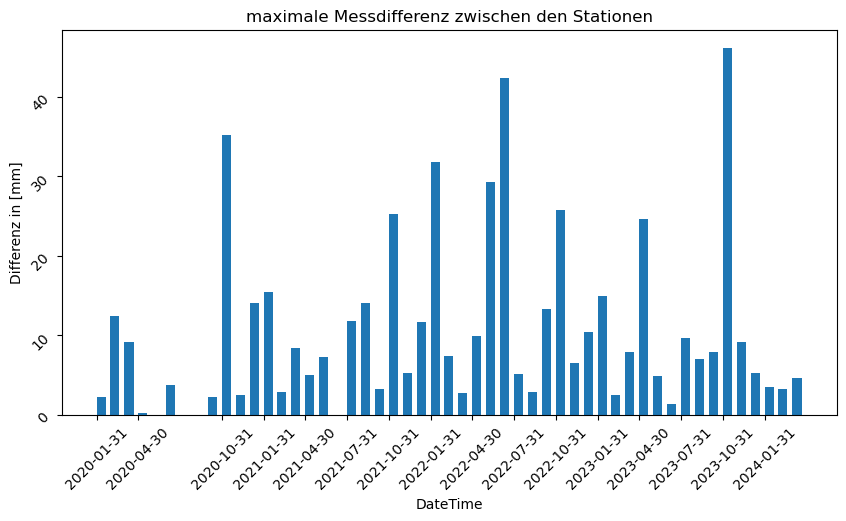

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(list_min_max_index, list_min_max_precip, width=20, align='edge')

ax.set_title('maximale Messdifferenz zwischen den Stationen')
ax.set_xlabel('DateTime')
ax.set_ylabel('Differenz in [mm]')

timedelta = list_min_max_index[2] - list_min_max_index[1]
if timedelta == datetime.timedelta(days=30) or timedelta == datetime.timedelta(days=31) or timedelta == datetime.timedelta(days=28) or timedelta == datetime.timedelta(days=29):
        plt.xticks(list_min_max_index[::3], rotation=45)
else:
    plt.xticks(list_min_max_index, rotation=45)
    
plt.yticks(rotation=45)

plt.show()

In [40]:
# for index in index_ausreißer:
#     print(summen_alle_Stationen.loc[index])

In [41]:
# WS100_rtu_1Y['precipitation.1']

In [42]:
# WS300_rtu_1Y['precipitation.1']

In [43]:
# Raine_rtu_1Y['Niederschlagsmenge']

In [44]:
# L_pcp_rtu_1Y

In [45]:
# summen_alle_Stationen.loc['31-10-2023']

In [46]:
# len(index_max_range)

In [47]:
# print(list_min_max_precip)

In [48]:
# differenz für die jeweiligen Monate plotten

In [49]:
summen_alle_Stationen.fillna('', inplace=True)

In [50]:
# summen_alle_Stationen

In [51]:
# summen_alle_Stationen = summen_alle_Stationen.applymap(lambda x: np.nan if isinstance(x, str) else x)

In [52]:
# summen_alle_Stationen

In [53]:
# zahl_mal_2 = lambda x, y: x * 2 + y

In [54]:
# zahl_mal_2(3, 4)

In [55]:
# summe_L_pcp[('1M', 'rr07')]

In [56]:
# Vergleiche Statoinen mit Raine
#
#
#
#
# startindex Raine: 2022-11-03 11:46:00	
# endtindex Raine: 2024-04-22 17:13:00

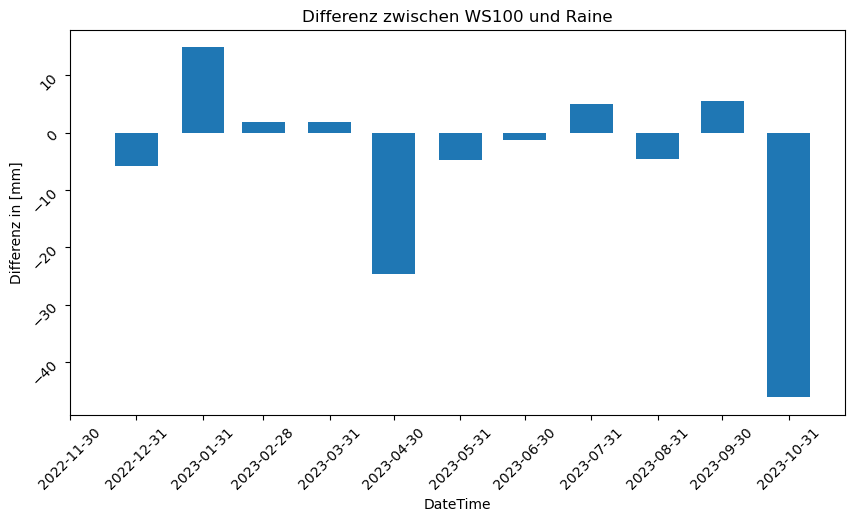

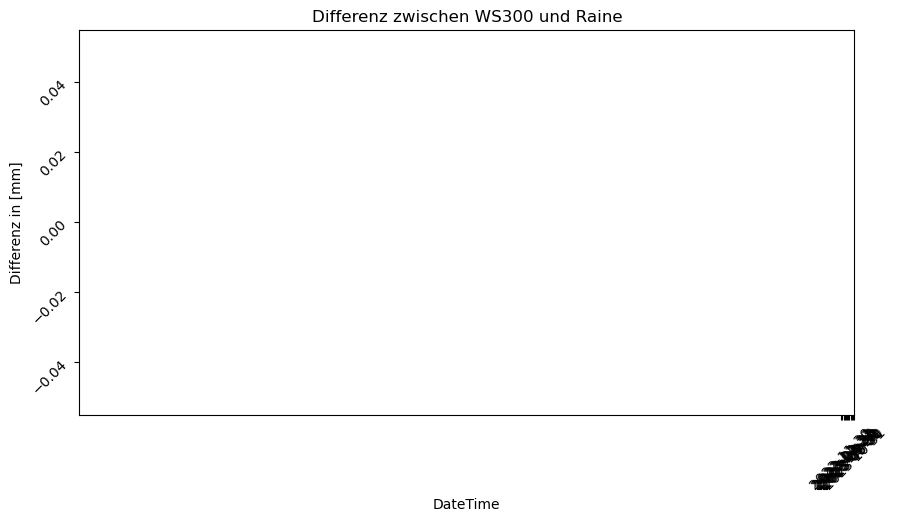

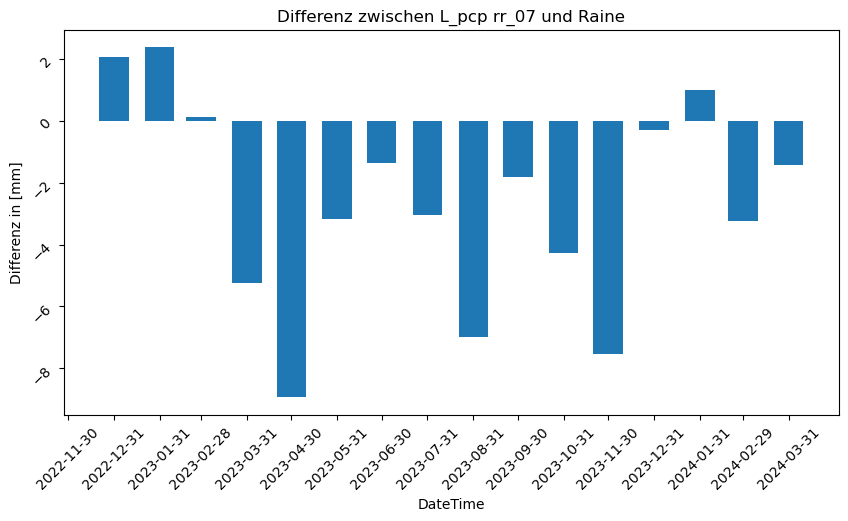

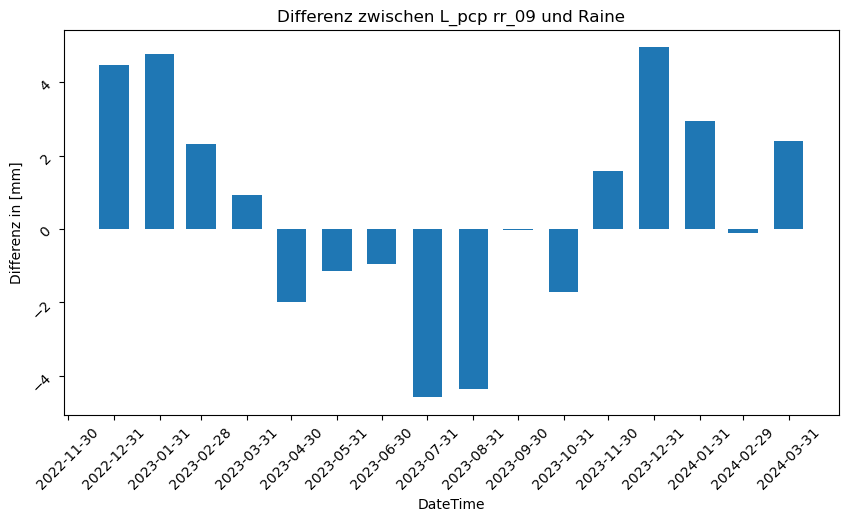

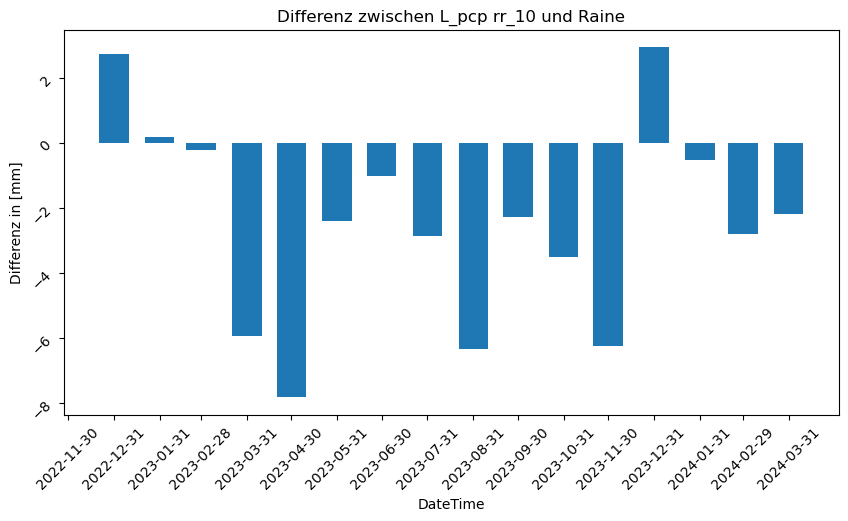

In [57]:
reference = Raine_rtu_1M['Niederschlagsmenge']

station_info = [[WS100_rtu_1M['precipitation.1'], 'WS100', 'Raine'], 
                [WS300_rtu_1M['precipitation.1'], 'WS300', 'Raine'],
                [L_pcp_rtu_1M['rr_07'], 'L_pcp rr_07', 'Raine'],
                [L_pcp_rtu_1M['rr_09'], 'L_pcp rr_09', 'Raine'],
                [L_pcp_rtu_1M['rr_10'], 'L_pcp rr_10', 'Raine']]

for i in range(len(station_info)):

    list_difference = [] 
    list_difference_index = []

    for index in index_max_range:

        try:
            difference = station_info[i][0].loc[index] - reference.loc[index]

            list_difference.append(difference)
            list_difference_index.append(index)
        except KeyError:
            pass

    # plot 

    data = list_difference
    index_input = list_difference_index

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.bar(index_input, data, width=20, align='center')

    ax.set_title('Differenz zwischen ' + station_info[i][1] + ' und ' + station_info[i][2])
    ax.set_xlabel('DateTime')
    ax.set_ylabel('Differenz in [mm]')

    if len(index_input) > 40:
        plt.xticks(index_input[::3], rotation=45)
    else:
        plt.xticks(index_input, rotation=45)
        
    plt.yticks(rotation=45)

    plt.show()

In [58]:
# same_index = reference.index.intersection(station.index)

In [59]:
import matplotlib.dates as mdates

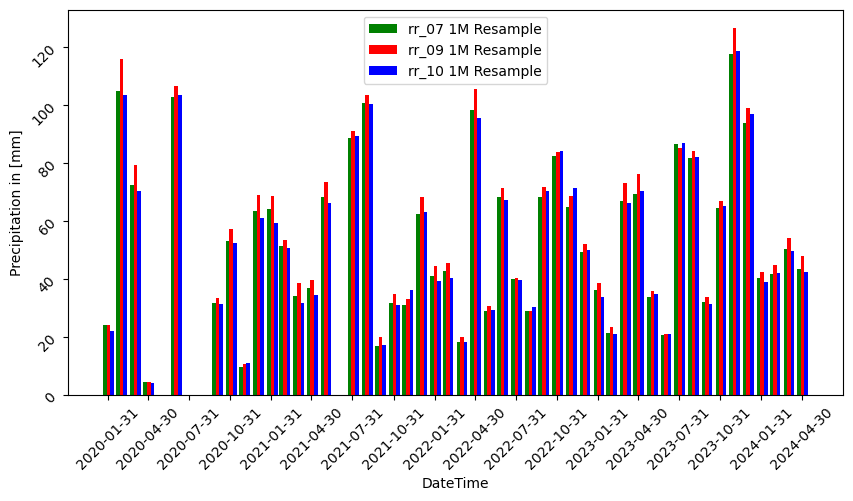

In [77]:
dataframe_1 = L_pcp_rtu_1M
column_1 = 'rr_07'
name_1 = 'rr_07 1M Resample'

dataframe_2 = L_pcp_rtu_1M
column_2 = 'rr_09'
name_2 = 'rr_09 1M Resample'

dataframe_3 = L_pcp_rtu_1M
column_3 = 'rr_10'
name_3 = 'rr_10 1M Resample'

dates = dataframe_1.index

x = mdates.date2num(dates)
width = 8
gap = 4

fig, ax = plt.subplots(figsize=(10, 5))

r1 = ax.bar(x - width - gap/2, dataframe_1[column_1], width, align='edge', color='green', label=name_1)
r2 = ax.bar(x - gap/2, dataframe_2[column_2], width, align='edge', color='red', label=name_2)
r3 = ax.bar(x + width - gap/2, dataframe_3[column_3], width, align='edge', color='blue', label=name_3)

# ax.set_title(name)

ax.set_xticks(x)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax.set_xlabel('DateTime')
ax.set_ylabel('Precipitation in [mm]')

if len(dataframe_1.index) > 40:
    plt.xticks(dataframe_1.index[::3], rotation=45)
else:
    plt.xticks(dataframe_1.index, rotation=45)
    
plt.yticks(rotation=45)
plt.legend()

plt.show()

In [69]:
lhg05_rtu_1M = fct.resampleDf(lhg_rtu[['lhg05']], '1M', leave_nan=False)
lhg07_rtu_1M = fct.resampleDf(lhg_rtu[['lhg07']], '1M', leave_nan=False)
lhg09_rtu_1M = fct.resampleDf(lhg_rtu[['lhg09']], '1M', leave_nan=False)
lhg10_rtu_1M = fct.resampleDf(lhg_rtu[['lhg10']], '1M', leave_nan=False)
lhg11_rtu_1M = fct.resampleDf(lhg_rtu[['lhg11']], '1M', leave_nan=False)

In [88]:
lhg05_rtu_1M.iloc[0].name

Timestamp('2021-01-31 00:00:00')

In [92]:
print(lhg05_rtu_1M.iloc[0].name, lhg05_rtu_1M.iloc[-1].name)
print(lhg07_rtu_1M.iloc[0].name, lhg07_rtu_1M.iloc[-1].name)
print(lhg09_rtu_1M.iloc[0].name, lhg09_rtu_1M.iloc[-1].name)
print(lhg10_rtu_1M.iloc[0].name, lhg10_rtu_1M.iloc[-1].name)
print(lhg11_rtu_1M.iloc[0].name, lhg11_rtu_1M.iloc[-1].name)

2021-01-31 00:00:00 2023-10-31 00:00:00
2021-01-31 00:00:00 2023-10-31 00:00:00
2021-01-31 00:00:00 2023-10-31 00:00:00
2021-01-31 00:00:00 2023-10-31 00:00:00
2021-01-31 00:00:00 2023-10-31 00:00:00


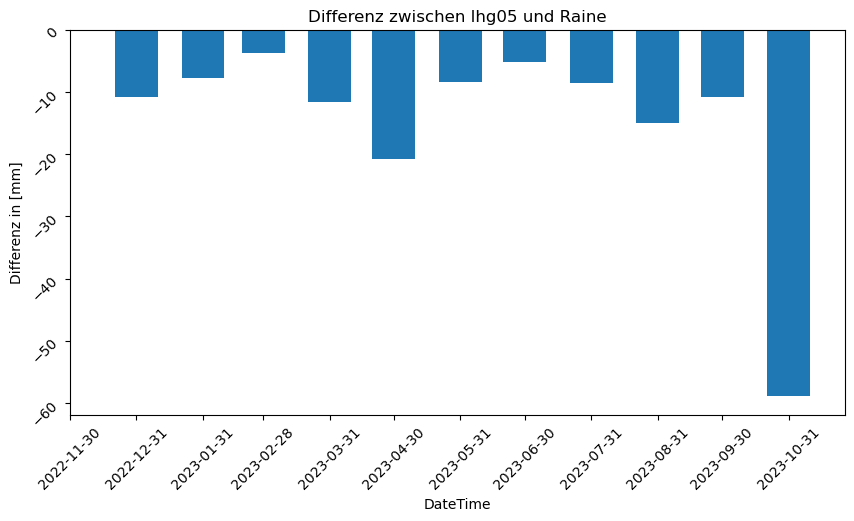

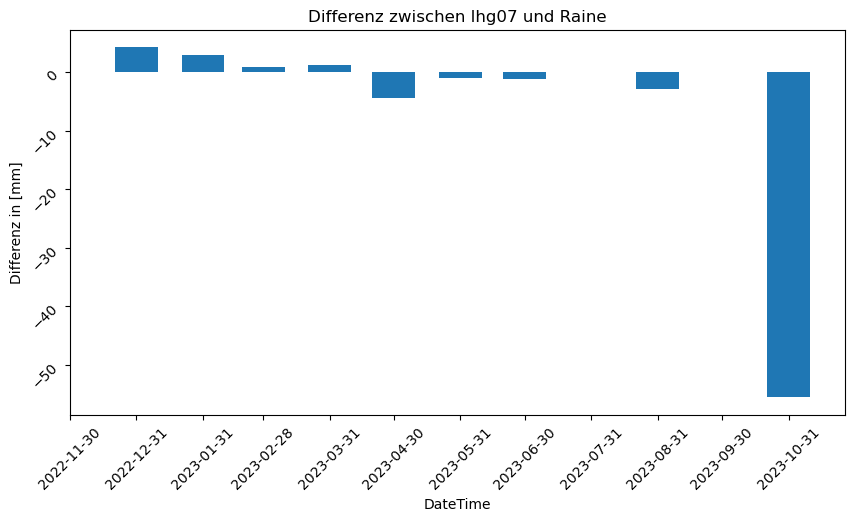

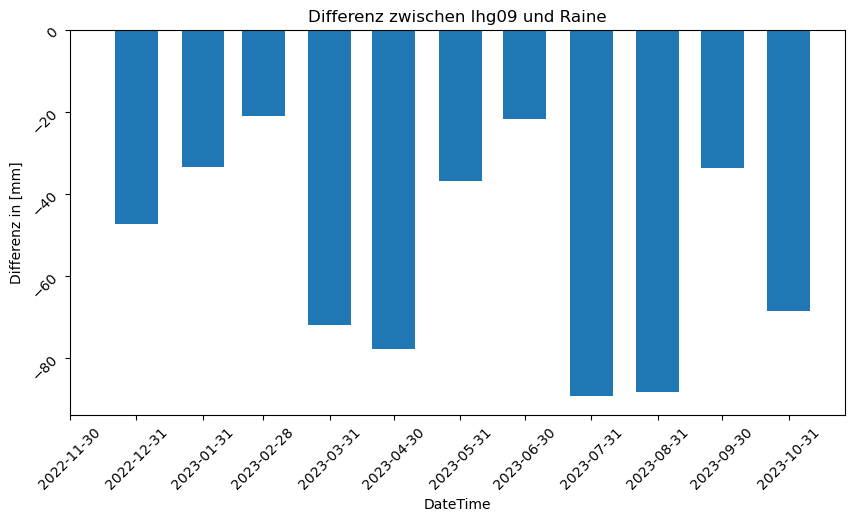

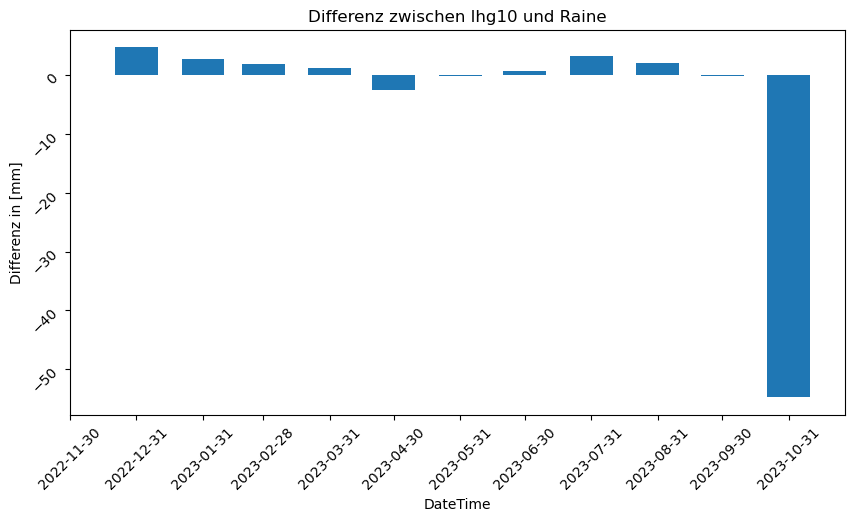

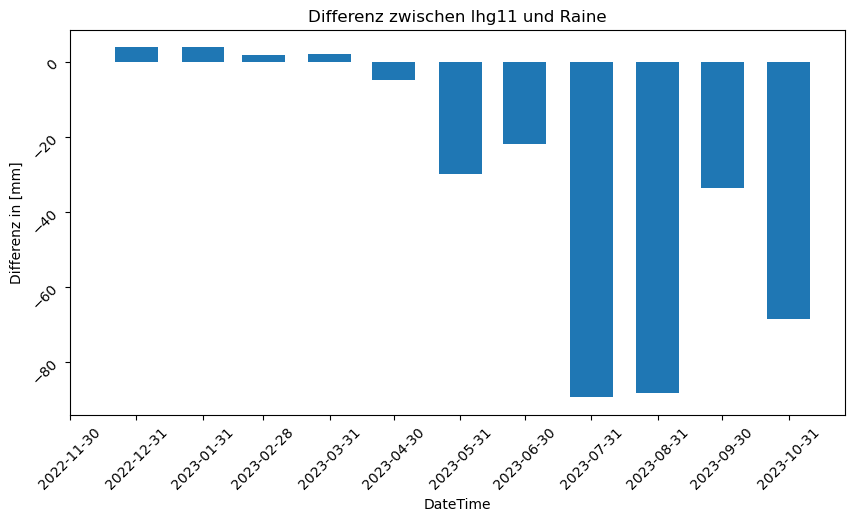

In [93]:
reference = Raine_rtu_1M['Niederschlagsmenge']

station_info = [[lhg05_rtu_1M['lhg05'], 'lhg05', 'Raine'],
                [lhg07_rtu_1M['lhg07'], 'lhg07', 'Raine'],
                [lhg09_rtu_1M['lhg09'], 'lhg09', 'Raine'],
                [lhg10_rtu_1M['lhg10'], 'lhg10', 'Raine'],
                [lhg11_rtu_1M['lhg11'], 'lhg11', 'Raine']]

for i in range(len(station_info)):

    list_difference = [] 
    list_difference_index = []

    for index in index_max_range:

        try:
            difference = station_info[i][0].loc[index] - reference.loc[index]

            list_difference.append(difference)
            list_difference_index.append(index)
        except KeyError:
            pass

    # plot 

    data = list_difference
    index_input = list_difference_index

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.bar(index_input, data, width=20, align='center')

    ax.set_title('Differenz zwischen ' + station_info[i][1] + ' und ' + station_info[i][2])
    ax.set_xlabel('DateTime')
    ax.set_ylabel('Differenz in [mm]')

    if len(index_input) > 40:
        plt.xticks(index_input[::3], rotation=45)
    else:
        plt.xticks(index_input, rotation=45)
        
    plt.yticks(rotation=45)

    plt.show()

In [101]:
list_stations_columns = [[lhg05_rtu_1M, 'lhg05', 'lhg05 1M Resample'],
                        [lhg07_rtu_1M, 'lhg07', 'lhg07 1M Resample'],
                        [lhg09_rtu_1M, 'lhg09', 'lhg09 1M Resample'],
                        [lhg10_rtu_1M, 'lhg10', 'lhg10 1M Resample'],
                        [lhg11_rtu_1M, 'lhg11', 'lhg11 1M Resample']]

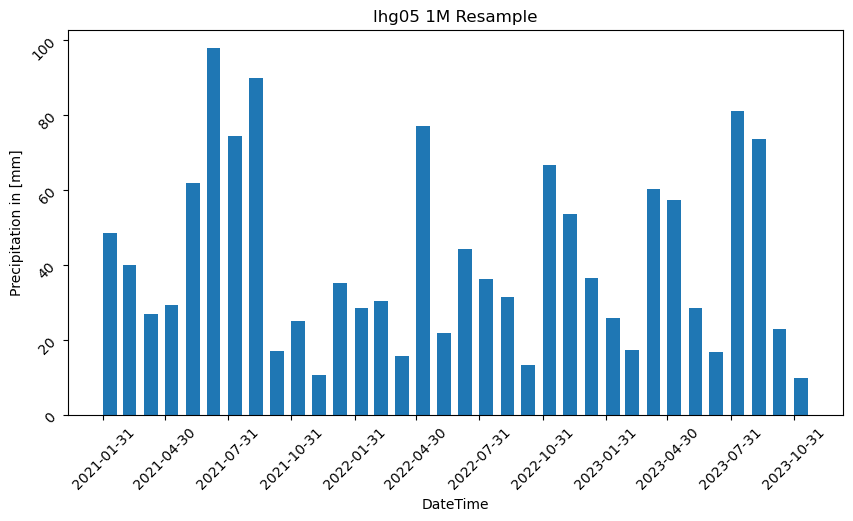

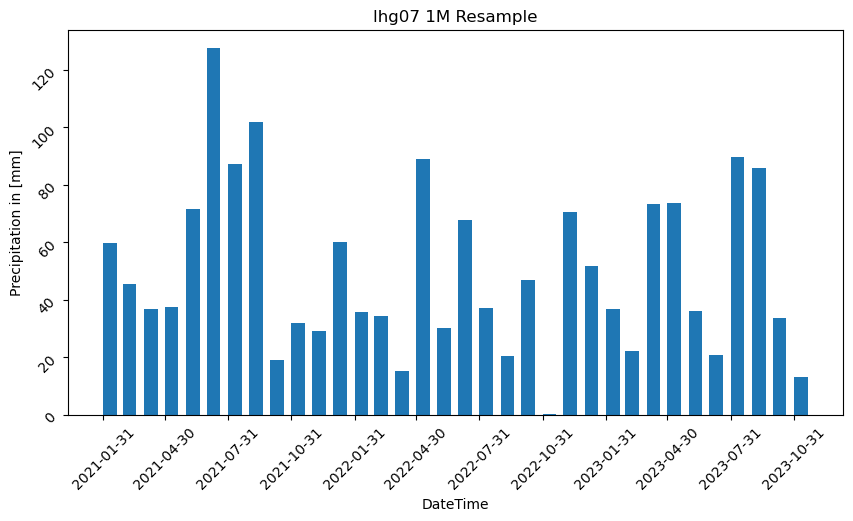

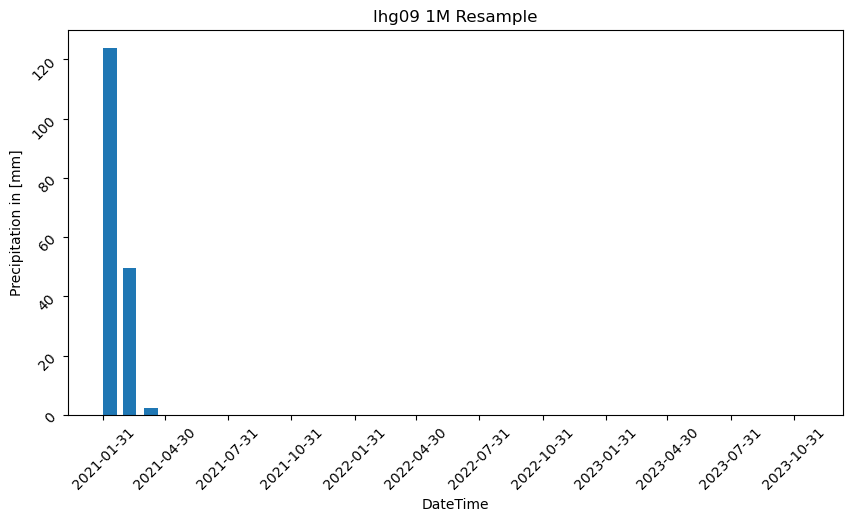

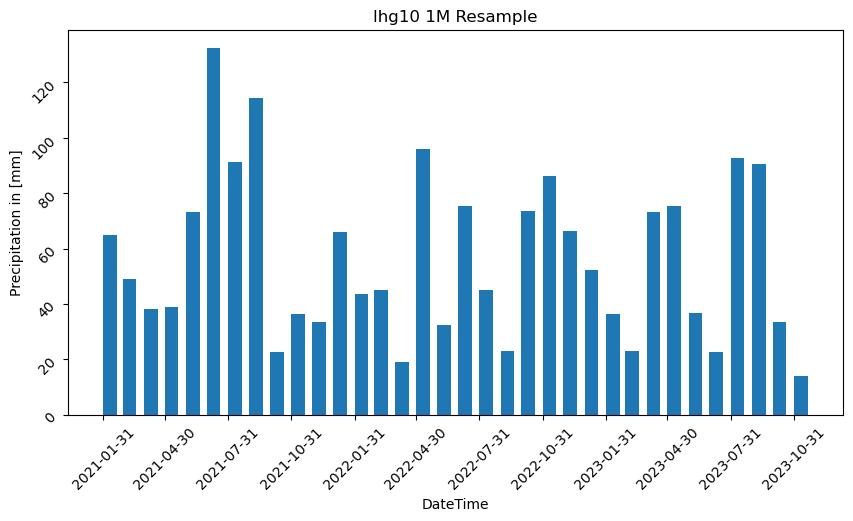

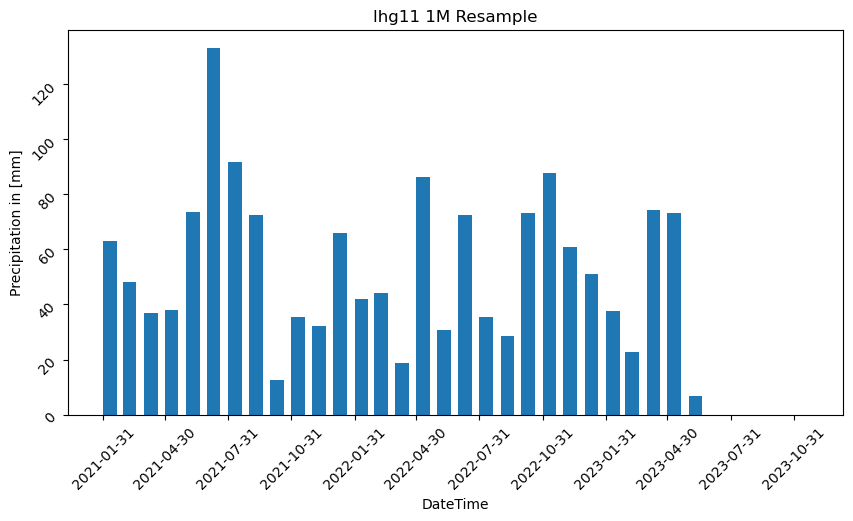

In [102]:
for list in list_stations_columns:
    balkendiagramm(list[0], list[1], list[2])